<a href="https://colab.research.google.com/github/sh823/ORIESIM/blob/main/HW5_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 5

#### Students: Steve Hwang (sh823)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday, October 13, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.

Used Chatgpt for code fragments

### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).




---
---


# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

___
## Ans.


___

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

___

## Ans.



___
___

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

___

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?
___


## Ans.

$$
P(Y = y) =
\begin{cases}
(1-p)^{40} & \text{if } y = 40 \\
(1-p)^yp & \text{if } 0 \leq y < 40
\end{cases}
$$



___

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.
___

## Ans.


In [35]:
import pandas as pd
import numpy as np

# Load the sales data from CSV
df = pd.read_csv('Soup_sales_data.csv')
# Calculate the sample mean
sample_mean = df['Y'].mean()

# Use the sample mean as the maximum likelihood estimator for p
mle_p = 1 - (1 / sample_mean)

print("Maximum Likelihood Estimator (MLE) of p:", mle_p)


Maximum Likelihood Estimator (MLE) of p: 0.9582811848143513


___
___

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

___

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.
___

## Ans.

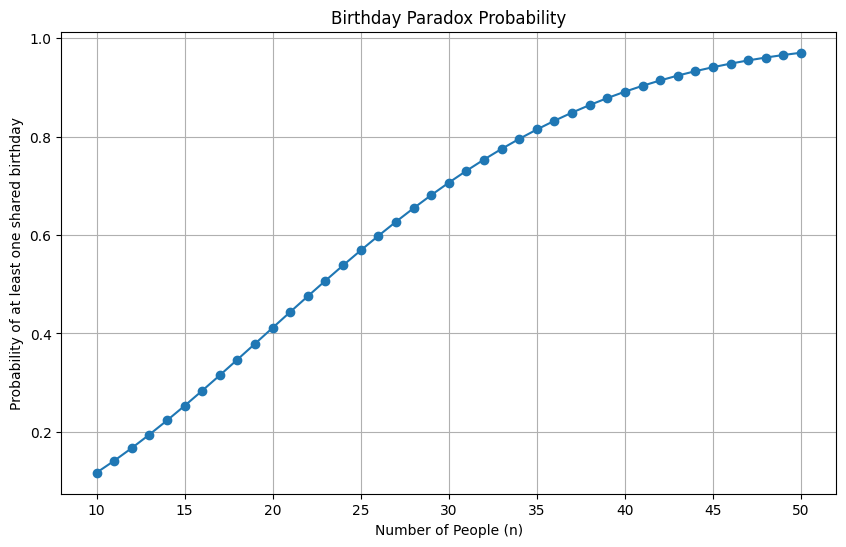

In [36]:
import matplotlib.pyplot as plt

def birthday_probability(n):
    # Calculate the probability of no shared birthday
    prob_no_shared_birthday = 1.0
    for i in range(n):
        prob_no_shared_birthday *= (365 - i) / 365
    # Calculate the complementary probability
    prob_shared_birthday = 1 - prob_no_shared_birthday
    return prob_shared_birthday

# Values of n from 10 to 50
n_values = range(10, 51)

# Calculate the probabilities
probabilities = [birthday_probability(n) for n in n_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, probabilities, marker='o')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of at least one shared birthday')
plt.title('Birthday Paradox Probability')
plt.grid(True)
plt.show()


___
**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.
___

## Ans.

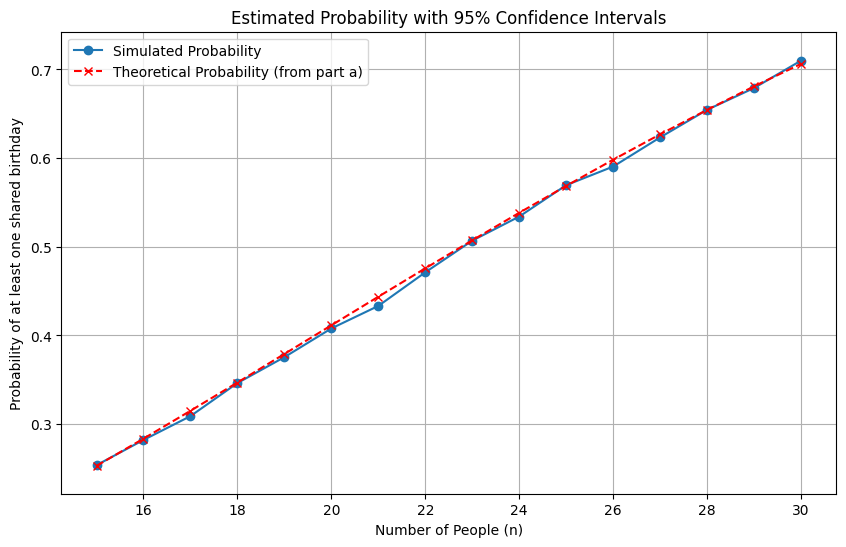

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Function to perform simulations and estimate probability
def estimate_probability(n, num_simulations=10000):
    shared_birthday_count = 0
    for _ in range(num_simulations):
        # Generate random birthdays for n people (1 to 365)
        birthdays = np.random.randint(1, 366, size=n)
        # Check if there's at least one shared birthday
        if len(birthdays) != len(set(birthdays)):
            shared_birthday_count += 1
    return shared_birthday_count / num_simulations

# Values of n from 15 to 30
n_values = range(15, 31)

# Perform simulations and estimate probabilities
estimated_probabilities = [estimate_probability(n) for n in n_values]

# Calculate 95% confidence intervals
confidence_intervals = []
for n in n_values:
    # Calculate standard error
    se = np.sqrt((estimated_probabilities[n - 15] * (1 - estimated_probabilities[n - 15])) / 10000)
    # Calculate margin of error (z = 1.96 for 95% CI)
    margin_of_error = 1.96 * se
    # Calculate lower and upper bounds of CI
    lower_bound = estimated_probabilities[n - 15] - margin_of_error
    upper_bound = estimated_probabilities[n - 15] + margin_of_error
    confidence_intervals.append((lower_bound, upper_bound))

# Theoretical probabilities from part (a)
theoretical_probabilities = [birthday_probability(n) for n in n_values]

# Plot the estimates and 95% CI
plt.figure(figsize=(10, 6))
plt.plot(n_values, estimated_probabilities, marker='o', label='Simulated Probability')
for i, n in enumerate(n_values):
    plt.fill_between([n], confidence_intervals[i][0], confidence_intervals[i][1], alpha=0.2)
plt.plot(n_values, theoretical_probabilities, marker='x', linestyle='--', color='red', label='Theoretical Probability (from part a)')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of at least one shared birthday')
plt.title('Estimated Probability with 95% Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()




---

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)
___

## Ans.

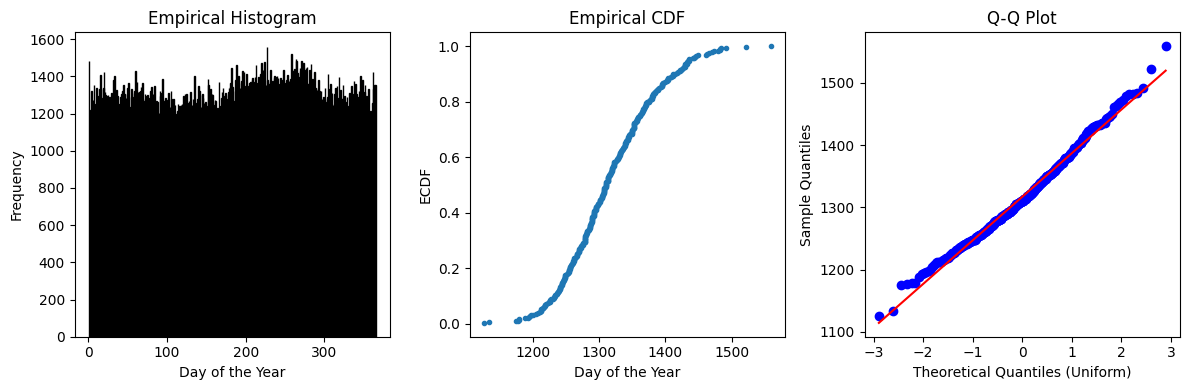

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset from bdaydata.txt
data = pd.read_csv('bdaydata.txt', sep=" ")
data = data['count']
days = np.arange(1, 366)  # 365 days

# Create an empirical histogram of the data
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.bar(days, data, edgecolor='k')
plt.title('Empirical Histogram')
plt.xlabel('Day of the Year')
plt.ylabel('Frequency')

# Create an empirical cumulative distribution function (ECDF)
plt.subplot(132)
data_sorted = np.sort(data)
ecdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
plt.plot(data_sorted, ecdf, marker='.', linestyle='none')
plt.title('Empirical CDF')
plt.xlabel('Day of the Year')
plt.ylabel('ECDF')

# Create a Q-Q plot comparing the data to a uniform distribution
plt.subplot(133)
uniform_dist = np.arange(1, len(data_sorted) + 1) / (len(data_sorted) + 1)
stats.probplot(data_sorted, plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles (Uniform)')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


___

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

___

## Ans.


In [25]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('bdaydata.txt', sep=" ")
observed_frequencies = data['count']

# Define the expected frequencies for a uniform distribution
total_count = observed_frequencies.sum()
expected_frequency = total_count / 365

expected_frequencies = [expected_frequency] * 365

# Perform the Chi-square test
chi2_stat, chi2_p = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p = stats.kstest(observed_frequencies, 'uniform', args=(0, total_count))

# Print the results
print(f"Chi-square Test Statistic: {chi2_stat}")
print(f"Chi-square Test p-value: {chi2_p}")
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"Kolmogorov-Smirnov Test p-value: {ks_p}")


Chi-square Test Statistic: 1352.7233599950073
Chi-square Test p-value: 1.2489373800065057e-113
Kolmogorov-Smirnov Test Statistic: 0.9967569141799195
Kolmogorov-Smirnov Test p-value: 0.0


___

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

___

## Ans.


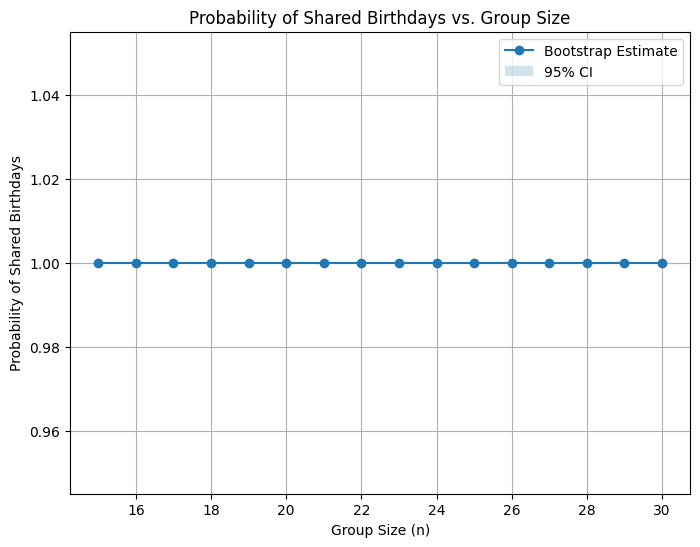

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from bdaydata.txt
data = pd.read_csv('bdaydata.txt', sep=" ")
birthday_counts = data['count']

# Define the function to estimate the probability of shared birthdays for a given sample size
def estimate_probability_shared_birthdays(sample_size, n_iterations=10000):
    shared_birthday_count = 0
    for _ in range(n_iterations):
        # Randomly sample with replacement
        sampled_birthdays = np.random.choice(birthday_counts.index, size=sample_size, replace=True)
        # Check if there is a shared birthday in the sample
        if any(birthday_counts.iloc[sampled_birthdays] >= 2):
            shared_birthday_count += 1
    return shared_birthday_count / n_iterations

# Calculate the estimates for various sample sizes
sample_sizes = range(15, 31)
probability_estimates = [estimate_probability_shared_birthdays(n) for n in sample_sizes]

# Calculate 95% confidence intervals for the estimates
n_iterations = 10000
bootstrap_samples = [estimate_probability_shared_birthdays(n, n_iterations) for n in sample_sizes]
ci_low = np.percentile(bootstrap_samples, 2.5)
ci_high = np.percentile(bootstrap_samples, 97.5)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, probability_estimates, marker='o', label='Bootstrap Estimate')
plt.fill_between(sample_sizes, [ci_low] * len(sample_sizes), [ci_high] * len(sample_sizes), alpha=0.2, label='95% CI')
plt.title('Probability of Shared Birthdays vs. Group Size')
plt.xlabel('Group Size (n)')
plt.ylabel('Probability of Shared Birthdays')
plt.legend()
plt.grid(True)
plt.show()


___
___

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



___

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials.
___


## Ans.

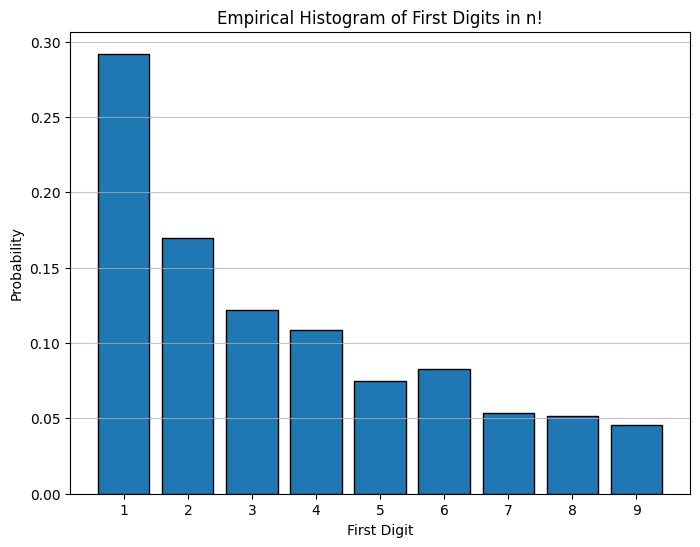

In [27]:

import numpy as np
import matplotlib.pyplot as plt

n = 1500  # Number of factorials to compute

# Compute n! for the first n integers
fact_series = [np.math.factorial(i) for i in range(n)]

# Extract the first digit of each factorial
first_digits = [int(str(fact)[0]) for fact in fact_series]

# Create an empirical histogram of the first digits
plt.figure(figsize=(8, 6))
plt.hist(first_digits, bins=range(1, 11), rwidth=0.8, align='left', density=True, edgecolor='k')
plt.title('Empirical Histogram of First Digits in n!')
plt.xlabel('First Digit')
plt.ylabel('Probability')
plt.xticks(range(1, 10))
plt.grid(axis='y', alpha=0.75)

plt.show()


___
**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

___


## Ans.

In [29]:
import numpy as np
from scipy.stats import chisquare

n = 1500  # Number of factorials to compute

# Compute n! for the first n integers
fact_series = [np.math.factorial(i) for i in range(n)]

# Extract the first digit of each factorial
first_digits = [int(str(fact)[0]) for fact in fact_series]

# Calculate the observed frequencies
observed_frequencies = [first_digits.count(digit) for digit in range(1, 10)]

# Calculate the sum of observed frequencies
total_observed = sum(observed_frequencies)

# Define the expected uniform distribution
expected_frequency = total_observed / 9  # Adjust expected frequencies

# Calculate the expected frequencies
expected_frequencies = [expected_frequency] * 9

# Perform the Chi-square test
chi2_stat, chi2_p = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print the results
print(f"Chi-square Test Statistic: {chi2_stat}")
print(f"Chi-square Test p-value: {chi2_p}")


Chi-square Test Statistic: 670.8000000000002
Chi-square Test p-value: 1.3805718582880795e-139


___

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


___

In [30]:
import numpy as np
from scipy.stats import chisquare

n = 1500  # Number of factorials to compute

# Compute n! for the first n integers
fact_series = [np.math.factorial(i) for i in range(n)]

# Extract the first digit of each factorial
first_digits = [int(str(fact)[0]) for fact in fact_series]

# Calculate the observed frequencies
observed_frequencies = [first_digits.count(digit) for digit in range(1, 10)]

# Define the expected frequencies based on Benford's Law
benford_expected_frequencies = [np.log10(d + 1) - np.log10(d) for d in range(1, 10)]
total_observed = sum(observed_frequencies)

# Normalize the expected frequencies
expected_frequencies = [freq * total_observed for freq in benford_expected_frequencies]

# Perform the Chi-square test
chi2_stat, chi2_p = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print the results
print(f"Chi-square Test Statistic: {chi2_stat}")
print(f"Chi-square Test p-value: {chi2_p}")


Chi-square Test Statistic: 9.456569118464648
Chi-square Test p-value: 0.3052548339606756


___

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.
___

## Ans.

In [34]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare

# Load the US population dataset
us_pop_data = pd.read_csv('us_pop.csv')

# Extract the population numbers
population_numbers = us_pop_data['population']

# Extract the leading digits of the population numbers
leading_digits = [int(str(population)[0]) for population in population_numbers]

# Calculate the observed frequencies
observed_frequencies = [leading_digits.count(digit) for digit in range(1, 10)]

# Calculate the sum of observed frequencies
total_observed = sum(observed_frequencies)

# Define expected frequencies for the uniform distribution
expected_frequency_uniform = total_observed / 9  # Uniform distribution
expected_frequencies_uniform = [expected_frequency_uniform] * 9

# Perform the Chi-square test for the uniform distribution
chi2_stat_uniform, chi2_p_uniform = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies_uniform)

# Define expected frequencies based on Benford's Law
benford_expected_frequencies = [np.log10(d + 1) - np.log10(d) for d in range(1, 10)]
total_expected_benford = sum(benford_expected_frequencies)

# Normalize the expected frequencies based on Benford's Law
expected_frequencies_benford = [freq * total_observed / total_expected_benford for freq in benford_expected_frequencies]

# Perform the Chi-square test for Benford's Law
chi2_stat_benford, chi2_p_benford = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies_benford)

# Print the results
print("Uniform Distribution Chi-square Test:")
print(f"Chi-square Test Statistic: {chi2_stat_uniform}")
print(f"Chi-square Test p-value: {chi2_p_uniform}")

print("\nBenford's Law Distribution Chi-square Test:")
print(f"Chi-square Test Statistic: {chi2_stat_benford}")
print(f"Chi-square Test p-value: {chi2_p_benford}")


Uniform Distribution Chi-square Test:
Chi-square Test Statistic: 50323.53572
Chi-square Test p-value: 0.0

Benford's Law Distribution Chi-square Test:
Chi-square Test Statistic: 11.84322681811079
Chi-square Test p-value: 0.15833698137850147


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.